<a href="https://colab.research.google.com/github/alx1056/Big-O/blob/master/LTSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import math
import pandas_datareader as web
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [76]:
df = web.DataReader('AAPL', data_source='yahoo', start = '2016-01-01', end= '2020-02-10')
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,98.213585
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.752419
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,93.878586
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,89.916473
2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.391907
...,...,...,...,...,...,...
2020-02-04,319.640015,313.630005,315.309998,318.850006,34154100.0,318.095062
2020-02-05,324.760010,318.950012,323.519989,321.450012,29706700.0,320.688934
2020-02-06,325.220001,320.260010,322.570007,325.209991,26356400.0,324.440002


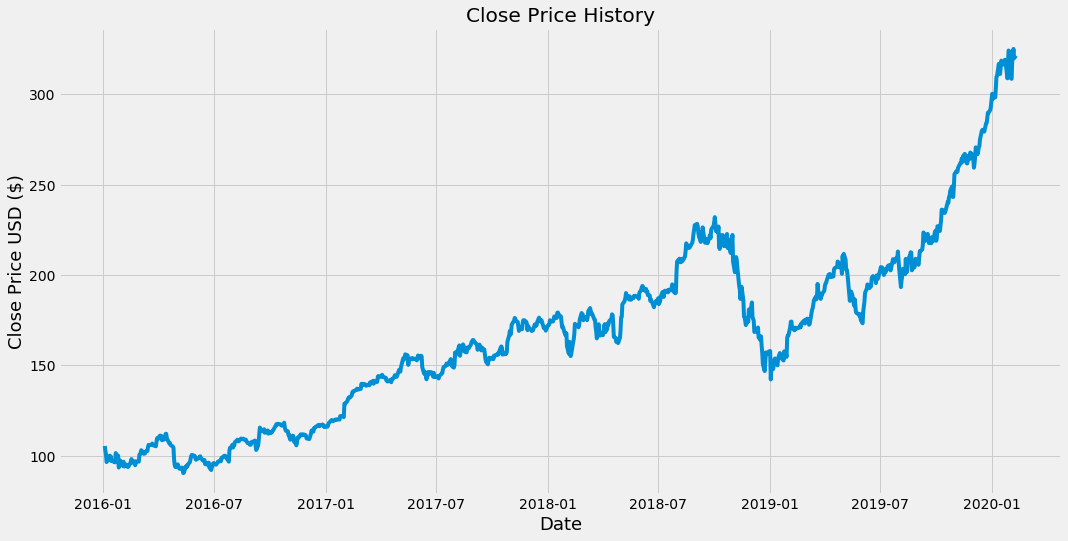

In [77]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [78]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

827

In [79]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0639077 ],
       [0.05266745],
       [0.04410951],
       ...,
       [1.        ],
       [0.97794528],
       [0.9844169 ]])

In [80]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.0639077 , 0.05266745, 0.04410951, 0.02601439, 0.02818582,
       0.03487036, 0.04095884, 0.03001662, 0.03908545, 0.02890961,
       0.02690853, 0.02746202, 0.02537577, 0.04717504, 0.03874486,
       0.04108657, 0.01311365, 0.01596628, 0.02980372, 0.02592925,
       0.0176268 , 0.02558863, 0.02665305, 0.01566824, 0.01988336,
       0.01979819, 0.01673266, 0.01430579, 0.01554052, 0.02682336,
       0.03312474, 0.02520546, 0.02426876, 0.0278452 , 0.01852091,
       0.02452421, 0.0273343 , 0.02797295, 0.02703626, 0.04338571,
       0.04432241, 0.04751566, 0.05394476, 0.04909101, 0.04551455,
       0.04589776, 0.04611062, 0.05075151, 0.05185848, 0.06062931,
       0.06654747, 0.06582368, 0.06633458, 0.06629202, 0.06974073,
       0.06722868, 0.06527016, 0.06322649, 0.07382809, 0.08183251])]
[0.07940563679312701]

[array([0.0639077 , 0.05266745, 0.04410951, 0.02601439, 0.02818582,
       0.03487036, 0.04095884, 0.03001662, 0.03908545, 0.02890961,
       0.02690853, 0.02746202, 0.02

In [81]:

#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(767, 60, 1)

In [0]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [83]:

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
767/767 [==============================] - 58s 76ms/step - loss: 0.0015


In [0]:

#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])             

In [85]:

#Convert the data to a numpy array
x_test = np.array(x_test)

#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

6.3737369196469675

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


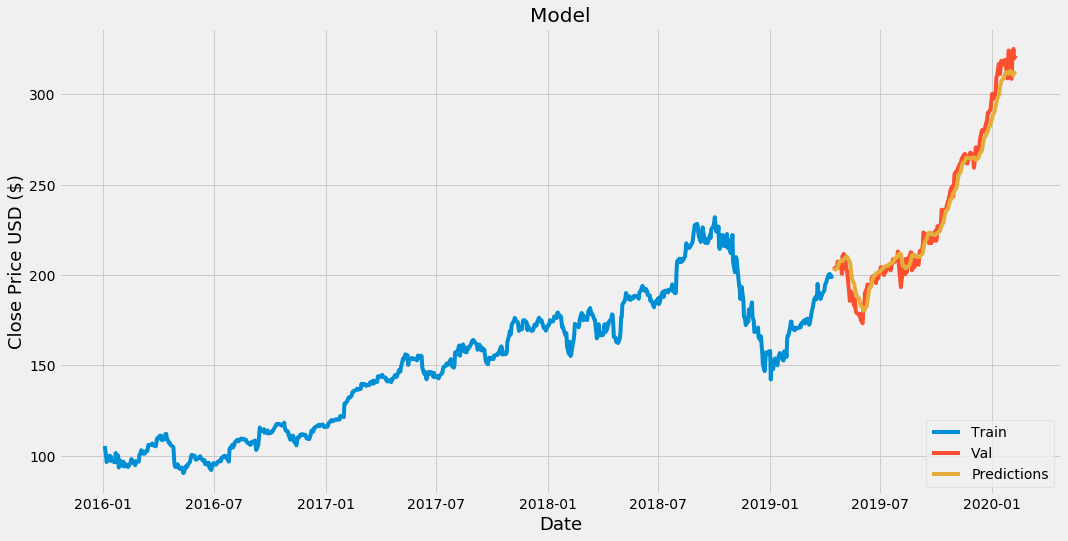

In [86]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [87]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-04-17,203.130005,202.278732
2019-04-18,203.860001,202.818283
2019-04-22,204.529999,203.518509
2019-04-23,207.479996,204.314514
2019-04-24,207.160004,205.380661
...,...,...
2020-02-04,318.850006,311.281006
2020-02-05,321.450012,310.761139
2020-02-06,325.209991,310.928650


In [88]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[272.74606]]


In [91]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-02-10', end='2020-02-11')
print(apple_quote2['Close'])

Date
2020-02-10    321.549988
2020-02-11    319.609985
Name: Close, dtype: float64
